<a href="https://colab.research.google.com/github/bryangohcx/ME3291/blob/main/ME_3291_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 a EXPLICIT SOLUTION

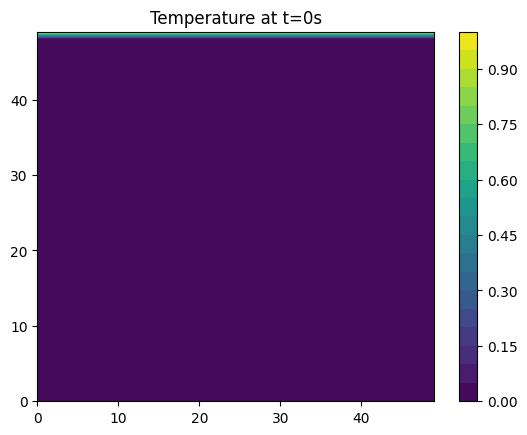

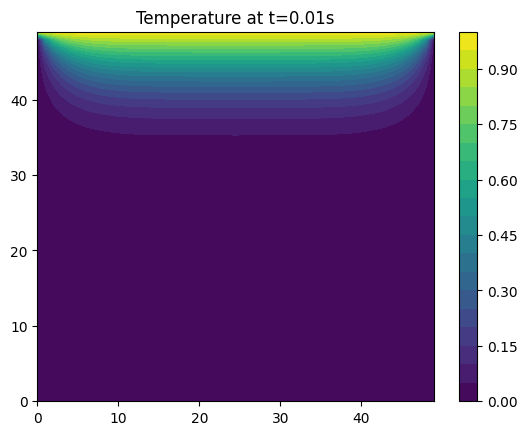

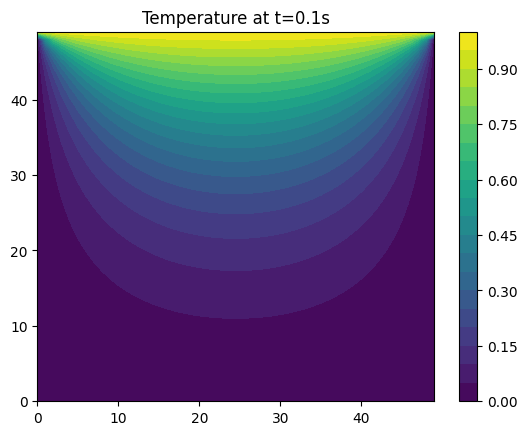

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # length of the square plate
N = 50  # number of grid points per dimension
dx = L / (N - 1)  # space step
dt = 0.0001  # time step, increased for stability and speed

# Time points to plot
time_points = [0.01, 0.1]
times_to_plot = [int(t / dt) for t in time_points]
current_time_step = 0

# Initialize temperature array
T = np.zeros((N, N))

# Boundary conditions
T[-1, :] = 1  # top boundary



# Plot initial state
plt.figure()
plt.contourf(T, levels=20, cmap='viridis')
plt.colorbar()
plt.title("Temperature at t=0s")
plt.show()

def finite_difference(T, dx, dt):
    T_new = T.copy()
    T_new[1:-1, 1:-1] = T[1:-1, 1:-1] + dt * (
        (T[2:, 1:-1] - 2*T[1:-1, 1:-1] + T[:-2, 1:-1]) / dx**2 +
        (T[1:-1, 2:] - 2*T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2)
    return T_new

# Simulation
for step in range(max(times_to_plot) + 1):
    T = finite_difference(T, dx, dt)
    if step in times_to_plot:
        plt.figure()
        plt.contourf(T, levels=20, cmap='viridis')
        plt.colorbar()
        plt.title(f"Temperature at t={time_points[times_to_plot.index(step)]}s")
        plt.show()
    current_time_step += 1



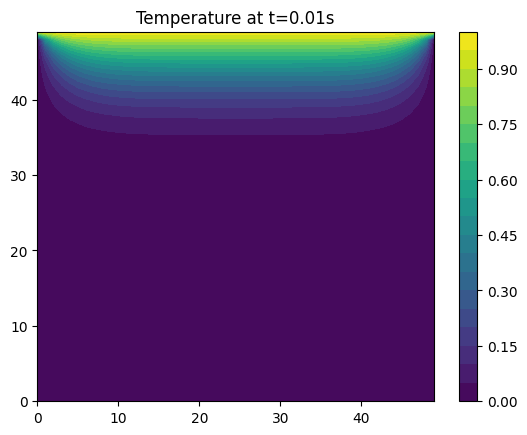

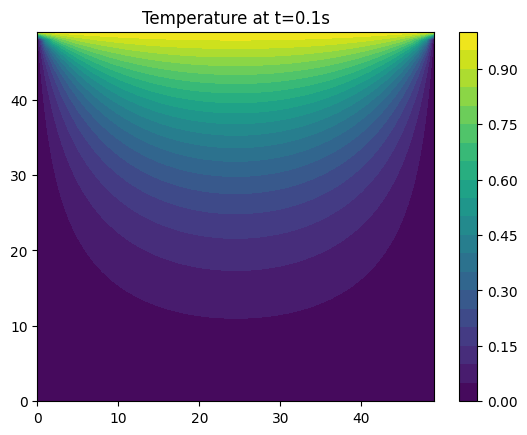

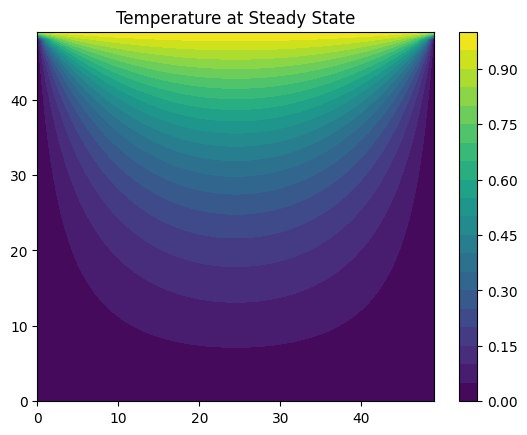

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the square plate
N = 50  # Number of grid points per dimension
dx = L / (N - 1)  # Space step
dt = 0.0001  # Time step, increased for stability and speed

# Time points to plot
time_points = [0.01, 0.1]
times_to_plot = [int(t / dt) for t in time_points]
current_time_step = 0

# Initialize temperature array
T = np.zeros((N, N))

# Boundary conditions
T[-1, :] = 1  # Top boundary

def finite_difference(T, dx, dt):
    T_new = T.copy()
    T_new[1:-1, 1:-1] = T[1:-1, 1:-1] + dt * (
        (T[2:, 1:-1] - 2*T[1:-1, 1:-1] + T[:-2, 1:-1]) / dx**2 +
        (T[1:-1, 2:] - 2*T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2)
    return T_new

# Simulation for the given time points
for step in range(1, max(times_to_plot) + 1):
    T = finite_difference(T, dx, dt)
    if step in times_to_plot:
        plt.figure()
        plt.contourf(T, levels=20, cmap='viridis')
        plt.colorbar()
        plt.title(f"Temperature at t={time_points[times_to_plot.index(step)]}s")
        plt.show()
    current_time_step += 1

# Continue the simulation to reach steady state
tolerance = 1e-5  # Tolerance to assume steady state is reached
steady_state_reached = False
while not steady_state_reached:
    T_new = finite_difference(T, dx, dt)
    # Check if the maximum change in temperature is below the tolerance
    if np.max(np.abs(T_new - T)) < tolerance:
        steady_state_reached = True
    T = T_new

# Plot steady state
plt.figure()
plt.contourf(T, levels=20, cmap='viridis')
plt.colorbar()
plt.title("Temperature at Steady State")
plt.show()


Q2

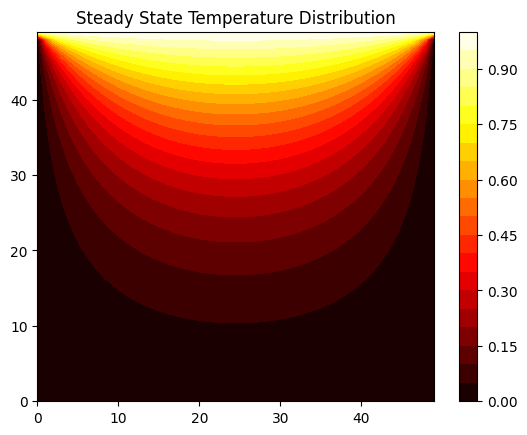

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # length of the square plate
N = 50  # number of grid points per dimension
dx = L / (N - 1)  # space step

# Initialize temperature array
T = np.zeros((N, N))

# Boundary conditions
T[-1, :] = 1  # top boundary

def update_temperature_laplace(T, dx):
    T_new = T.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            T_new[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
    return T_new

# Iterative solution
for iteration in range(10000):  # large number to ensure convergence
    T_new = update_temperature_laplace(T, dx)
    if np.allclose(T, T_new, atol=1e-4):  # convergence check
        break
    T = T_new

# Plotting
plt.figure()
plt.contourf(T, levels=20, cmap='hot')
plt.colorbar()
plt.title("Steady State Temperature Distribution")
plt.show()


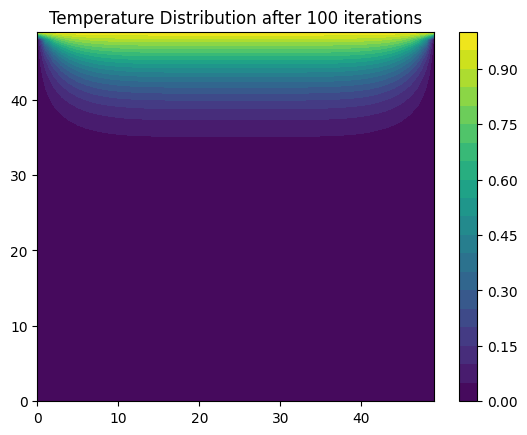

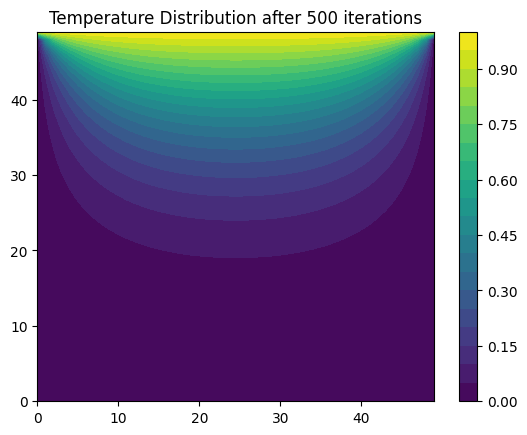

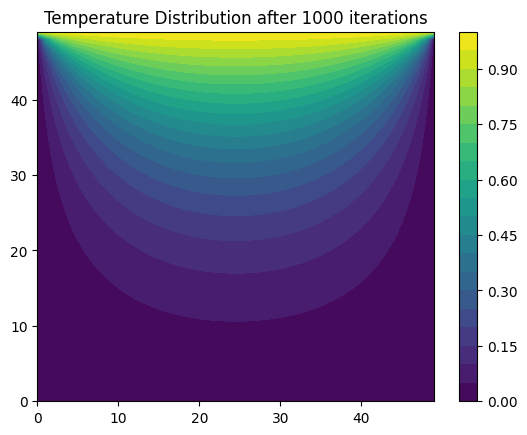

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # length of the square plate
N = 50  # number of grid points per dimension
dx = L / (N - 1)  # space step

# Initialize temperature array with boundary conditions
T = np.zeros((N, N))
T[-1, :] = 1  # top boundary

snapshots = {}  # Dictionary to store temperature distributions

def iterate_laplace(T, dx, snapshots, iterations):
    for iteration in range(1, iterations+1):
        T_new = T.copy()
        for i in range(1, N-1):
            for j in range(1, N-1):
                T_new[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
        T = T_new
        if iteration in [100, 500, 1000]:  # Capture snapshots at these iterations
            snapshots[iteration] = T.copy()
    return T, snapshots

# Perform iterations and capture snapshots
T, snapshots = iterate_laplace(T, dx, snapshots, 1000)

# Plotting snapshots
for t, snapshot in snapshots.items():
    plt.figure()
    plt.contourf(snapshot, levels=20, cmap='viridis')
    plt.colorbar()
    plt.title(f"Temperature Distribution after {t} iterations")
    plt.show()


Q3

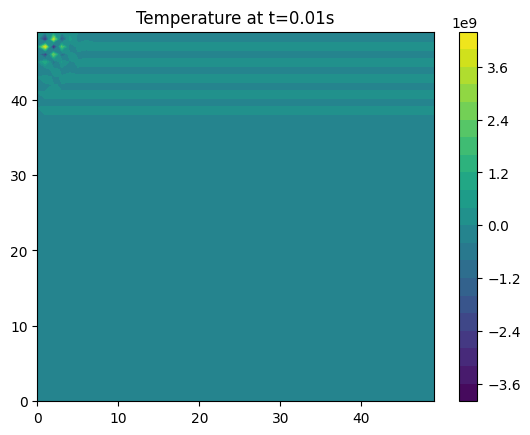

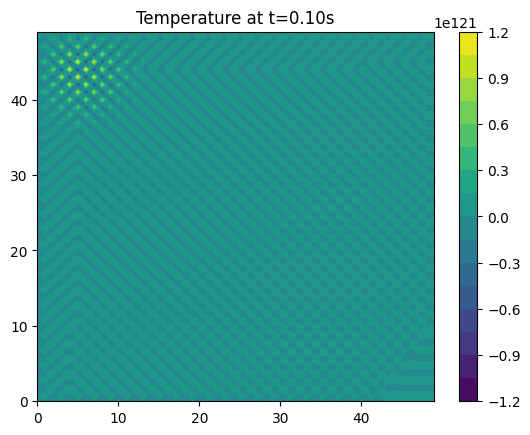

<ipython-input-25-a0fcae278c59>:19: RuntimeWarning: overflow encountered in add
  (T[2:, 1:-1] - 2*T[1:-1, 1:-1] + T[:-2, 1:-1]) / dx**2 +
<ipython-input-25-a0fcae278c59>:19: RuntimeWarning: overflow encountered in divide
  (T[2:, 1:-1] - 2*T[1:-1, 1:-1] + T[:-2, 1:-1]) / dx**2 +
<ipython-input-25-a0fcae278c59>:20: RuntimeWarning: overflow encountered in divide
  (T[1:-1, 2:] - 2*T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2)
<ipython-input-25-a0fcae278c59>:18: RuntimeWarning: invalid value encountered in add
  T_new[1:-1, 1:-1] = T[1:-1, 1:-1] + dt * (
<ipython-input-25-a0fcae278c59>:20: RuntimeWarning: invalid value encountered in subtract
  (T[1:-1, 2:] - 2*T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # length of the square plate
N = 50  # number of grid points per dimension
dx = L / (N - 1)  # space step
dt = 0.001  # time step
time_to_plot = [0.01, 0.1]  # Specific times to plot

# Initialize temperature array
T = np.zeros((N, N))
T[-1, :] = 1  # Top boundary set to 1

def update_temperature_with_neumann(T, dx, dt):
    T_new = T.copy()
    # Update interior points
    T_new[1:-1, 1:-1] = T[1:-1, 1:-1] + dt * (
        (T[2:, 1:-1] - 2*T[1:-1, 1:-1] + T[:-2, 1:-1]) / dx**2 +
        (T[1:-1, 2:] - 2*T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2)

    # Neumann condition at the right boundary
    T_new[1:-1, -1] = T_new[1:-1, -2]

    return T_new

# Simulation
current_time = 0.0
plot_number = 1
while plot_number <= len(time_to_plot):
    T = update_temperature_with_neumann(T, dx, dt)
    current_time += dt

    if current_time >= time_to_plot[plot_number-1]:
        plt.figure()
        plt.contourf(T, levels=20, cmap='viridis')
        plt.colorbar()
        plt.title(f"Temperature at t={current_time:.2f}s")
        plt.show()
        plot_number += 1

# Continue the simulation to reach steady state
steady_state_reached = False
max_iterations = 100000
iterations = 0
while not steady_state_reached and iterations < max_iterations:
    T_new = update_temperature_with_neumann(T, dx, dt)
    iterations += 1
    if np.max(np.abs(T_new - T)) < 1e-4:  # Check for steady state
        steady_state_reached = True
        plt.figure()
        plt.contourf(T_new, levels=20, cmap='viridis')
        plt.colorbar()
        plt.title("Temperature at Steady State")
        plt.show()
    T = T_new


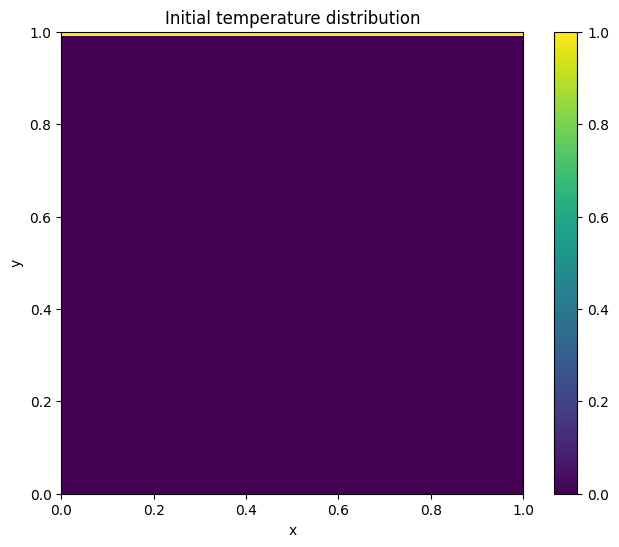

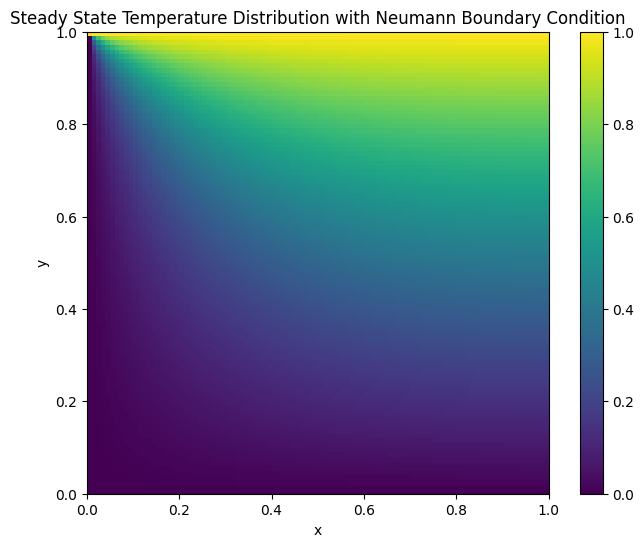

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the square plate
N = 100   # Number of grid points per dimension
dx = L / (N - 1)  # Grid spacing

# Initialize temperature array
T = np.zeros((N, N))

# Boundary conditions - Dirichlet
T[-1, :] = 1.0  # Top boundary

# plot initial state
plt.figure(figsize=(8, 6))
plt.imshow(T, extent=(0, L, 0, L), origin='lower', cmap='viridis', aspect='equal')
plt.colorbar()
plt.title('Initial temperature distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# Finite Difference Method for the steady state (Laplace equation)
for iteration in range(10000):
    T_new = T.copy()

    # Update interior points
    for i in range(1, N-1):
        for j in range(1, N-1):
            T_new[j, i] = 0.25 * (T[j+1, i] + T[j-1, i] + T[j, i+1] + T[j, i-1])

    # Neumann boundary condition at the right side
    T_new[:, -1] = T_new[:, -2]

    # Convergence check
    if np.allclose(T, T_new, atol=1e-5):
        break

    T = T_new

# Plot the heatmap of the temperature distribution
plt.figure(figsize=(8, 6))
plt.imshow(T, extent=(0, L, 0, L), origin='lower', cmap='viridis', aspect='equal')
plt.colorbar()
plt.title('Steady State Temperature Distribution with Neumann Boundary Condition')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


TypeError: Image data of dtype object cannot be converted to float

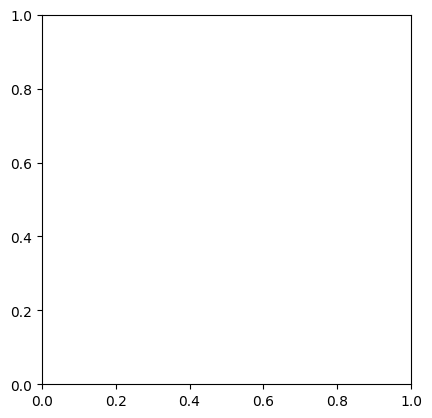

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the square plate
N = 50  # Number of grid points per dimension
dx = dy = L / (N - 1)  # Grid spacing
dt = 0.0001  # Time step

# Time points to plot
time_points = [0.001, 0.01, 0.1]
times_to_plot = [int(t / dt) for t in time_points]
snapshots = {t: None for t in time_points}  # To store temperature distributions at different times

# Initialize temperature array
T = np.zeros((N, N))

# Boundary conditions - Dirichlet
T[-1, :] = 1.0  # Top side at y=1.0

# Simulation
for step in range(1, max(times_to_plot) + 1):
    # Create a new array to hold the updated temperatures
    T_new = T.copy()

    # Update temperatures using the finite difference method (excluding boundaries)
    for i in range(1, N-1):
        for j in range(1, N-1):
            T_new[i, j] = T[i, j] + dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )

    # Apply Neumann boundary condition at x=1.0 (right side)
    T_new[:, -1] = T_new[:, -2]

    # Update the temperature grid
    T = T_new

    # Save snapshots at specified times
    if step in times_to_plot:
        snapshots[time_points[times_to_plot.index(step)]] = T.copy()

# Check for steady state after a large number of iterations
steady_state_reached = False
for _ in range(100000):
    T_new = T.copy()
    # Update temperatures using the finite difference method (excluding boundaries)
    for i in range(1, N-1):
        for j in range(1, N-1):
            T_new[i, j] = T[i, j] + dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx**2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy**2
            )

    # Apply Neumann boundary condition at x=1.0 (right side)
    T_new[:, -1] = T_new[:, -2]

    # Check if steady state is reached
    if np.allclose(T, T_new, atol=1e-5):
        steady_state_reached = True
        break

    T = T_new

# If not reached, assume last iteration is steady state for demonstration purposes
if not steady_state_reached:
    print("Steady state not reached; using last iteration as approximation.")
snapshots['steady'] = T

# Plot the snapshots at specified times and steady state
for time, snapshot in snapshots.items():
    plt.figure()
    plt.imshow(snapshot, cmap='viridis', origin='lower', extent=[0, L, 0, L])
    plt.colorbar()
    if time = 'steady':
      plt.title(f'Temperature distribution at steady state')
    else:
      plt.title(f'Temperature distribution at t={time}s')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


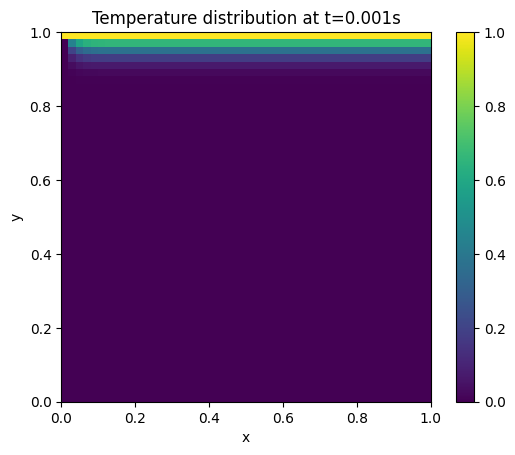

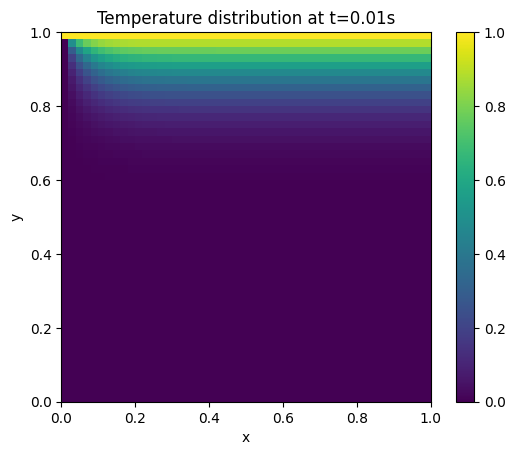

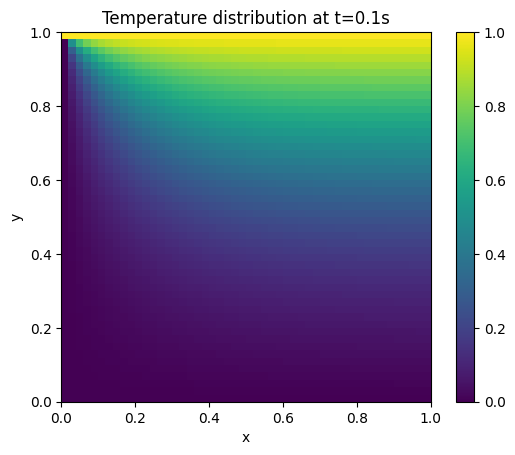

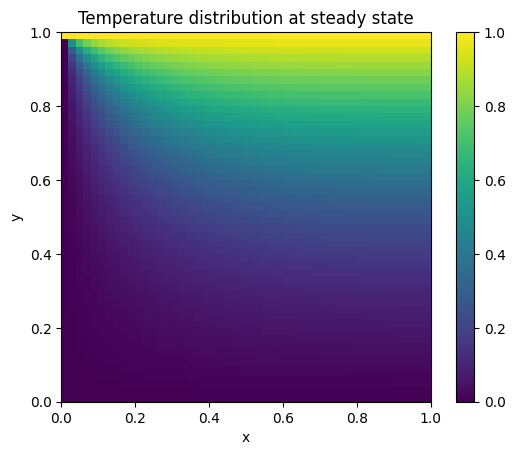

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def finite_difference_neumann(T, dx, dt):
    T_new = T.copy()
    # Apply the finite difference scheme for the interior
    T_new[1:-1, 1:-1] = T[1:-1, 1:-1] + dt * (
        (T[2:, 1:-1] - 2*T[1:-1, 1:-1] + T[:-2, 1:-1]) / dx**2 +
        (T[1:-1, 2:] - 2*T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2)
    # Apply Neumann BC for the right boundary (x = 1.0)
    T_new[1:-1, -1] = T_new[1:-1, -2]
    return T_new

# Parameters
L = 1.0  # Length of the square plate
N = 50  # Number of grid points per dimension
dx = dy = L / (N - 1)  # Grid spacing
dt = 0.0001  # Time step

# Time points to plot
time_points = [0.001, 0.01, 0.1]
times_to_plot = [int(t / dt) for t in time_points]
snapshots = {t: None for t in time_points}  # To store temperature distributions at different times

# Initialize temperature array with boundary conditions
T = np.zeros((N, N))
T[-1, :] = 1.0  # Top side at y=1.0

# Simulation
for step in range(1, max(times_to_plot) + 1):
    T = finite_difference_neumann(T, dx, dt)

    # Save snapshots at specified times
    if step in times_to_plot:
        snapshots[time_points[times_to_plot.index(step)]] = T.copy()

# Assuming the last step as an approximation of the steady state for demonstration
snapshots['steady'] = T

# Plot the snapshots at specified times and steady state
for time, snapshot in snapshots.items():
    plt.figure()
    plt.imshow(snapshot, cmap='viridis', origin='lower', extent=[0, L, 0, L])
    plt.colorbar()
    title = 'Temperature distribution at steady state' if time == 'steady' else f'Temperature distribution at t={time}s'
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
